In [5]:
import torch
from train import Trainer
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
def test(model, input_text):
    """
    Test the model by providing a sequence of text and predicting the next character.
    """
    model.model.eval()
    with torch.no_grad():

        input_indices = [model.dataloader.stoi[char] for char in input_text]
        x_test = torch.tensor(input_indices)
        
        output = model.model(x_test) 

        # predicted_index = torch.argmax(output[-1,:]).item()  
        proba = torch.softmax(output[-1, :], dim=-1)
        predicted_index = torch.multinomial(proba, 1).item()
        
        predicted_letter = [k for k, v_ in model.dataloader.stoi.items() if v_ == predicted_index]

    
    return predicted_letter

100%|██████████| 10000/10000 [11:06<00:00, 15.01it/s]


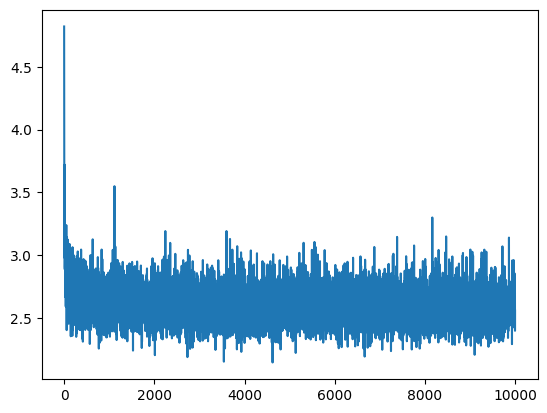

In [7]:
train = Trainer("shakespeare-data.txt", 128, 768, 128, 8, 12, 0.001, 10000)
train.run()
train.save_model()

plt.plot(train.running_loss)
plt.show()

In [8]:
# train = Trainer("jul-data.txt", 128, 768, 128, 8, 12, 0.001, 20000)
# train.load_model()

phrase = "We are accounted poor citizens, "
phrase_final = "We are accounted poor citizens, "

for _ in range(1000) : 

    lettre = test(train, phrase)
    phrase_final += phrase[0]
    phrase = phrase[1:] + lettre[0]
    


print(phrase_final)

We are accounted poor citizens, We are accounted poor citizens, d RYO: yofficho co ass yean h t fes, teleaned, atheoanoke thau o am's! I ty, S: bls, fof waiapit'teethePaves m bet o th ck iooursem

CHIOUSe as orell h
Wayeeve, wean,
Asty
MERe, y, old bl fo neapu bs omaicaines sthe,
Borbeaefocknore wid l,
od.
my httak ge ye s
Waras thounee?
HOnous; s weayid bl ININIORWapatoserede?


AROuck, sir Rgo sill y asther he ars, tese
BENou s arshaghate.

Whertl thy w haxtar?
Thigen IONTRINIOMy 'se wer
LAPERENTyse
IUL:
Heeacencke h y foseanclyhe,

MEO:
NCLIOf o I Youss?
GLowes, ly IUCUSI:
Whe ce wllafousa.
NUCIUCanow a, aimy h vanowindeeatot t.
IScetuscthero at, isho ayolly bank,'ls.
O y ds, me, t, ileworsp cakRONRUCHes rs atell il s toffhor be kel ie theat bre t.
He, bun, ourall Whepre said.

T: lil dero jew myoofe free hutha ile thay
f my have? fe, cet akid an? pllle areaneratot ound, angl wathowhapye ucenon my tusoknthost nee, IICH: yol.

I Yel y walon avier, a id:
FRIOFre ERERENoulithainds, gha